In [17]:
import pandas as pd
import numpy as np

In [18]:
# clean and write data to csv
cv = pd.read_csv('covid_data_raw.csv')
cv = cv[(cv["continent"]=="Europe") & (cv["indicator"] == "cases")]
cv.drop(["population", "country_code", "source", "rate_14_day", "cumulative_count", "indicator", "continent"], inplace=True, axis=1)

In [19]:
week_to_month = [
    "01","01","01","01","01",
    "02","02","02","02",
    "03","03","03","03",
    "04","04","04","04","04",
    "05","05","05","05",
    "06","06","06","06","06",
    "07","07","07","07",
    "08","08","08","08","08",
    "09","09","09","09",
    "10","10","10","10","10",
    "11","11","11","11",
    "12","12","12","12","12"]

cv["year_month"] = cv["year_week"].apply(lambda x: x[:5] + week_to_month[int(x[5:])])

In [20]:
cv.to_csv("covid_data.csv", index=False)
cv.head()

,country,weekly_count,year_week,year_month
376,Albania,2,2020-10,2020-03
377,Albania,40,2020-11,2020-03
378,Albania,47,2020-12,2020-03
379,Albania,123,2020-13,2020-04
380,Albania,149,2020-14,2020-04


In [21]:
gby = cv.groupby(["country", "year_month"]).sum().add_suffix('').reset_index()
gby.columns = ["country", "year_month", "month_count"]
gby.to_csv("covid_data_month.csv", index=False)
gby.head()

,country,year_month,month_count
0,Albania,2020-03,89
1,Albania,2020-04,637
2,Albania,2020-05,272
3,Albania,2020-06,1404
4,Albania,2020-07,2361


<AxesSubplot:xlabel='year_month'>

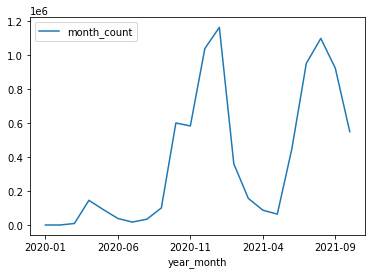

In [22]:
gby[gby["country"]=="United Kingdom"].plot(x="year_month", y="month_count", kind="line")

In [23]:
fb = pd.read_csv('../results_month.csv')
fb.head()

,country,year_month,home_score,away_score,neutral,home_win,away_win,games_played
0,Austria,2010-03,2,1,0,1,0,1
1,Austria,2010-05,0,1,0,0,1,1
2,Austria,2010-10,4,4,0,0,0,1
3,Austria,2010-11,1,2,0,0,1,1
4,Austria,2011-02,3,1,0,1,0,1


In [25]:
cv_fb = pd.merge(gby, fb, on=["country", "year_month"])
cv_fb.head()

,country,year_month,month_count,home_score,away_score,neutral,home_win,away_win,games_played
0,Austria,2020-09,16248,2,3,0,0,1,1
1,Austria,2020-10,67644,2,2,0,1,1,2
2,Austria,2020-11,167072,0,3,0,0,1,1
3,Austria,2021-03,77399,0,4,0,0,1,1
4,Austria,2021-06,6090,4,1,1,2,0,3
